<a href="https://colab.research.google.com/github/NikhilArjune/Customer-Segmentation-Based-on-RFM-Analysis-for-Efficient-Targeting/blob/main/Nikhil_Arjune_RFM_QuAD_AI_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name:** **Customer Segmentation Based on RFM Analysis for Efficient Targeting**

**Poject Type**  - Home Task

**Contribution** - Self

**Name** - Nikhil Arvind Arjune

#**Problem Staement**-


##**Introduction**
 Company  is a UK-based and registered non-store online retail company specializing in unique all-occasion gifts. Operating transnationally, the company serves a diverse customer base, including many wholesalers. The data set includes all transactions from 01/12/2010 to 09/12/2011.

##**Objective**
The primary objective of this project is to segment the customers based on Recency, Frequency, and Monetary (RFM) analysis. This segmentation will enable Company to target its customers more efficiently, enhancing marketing strategies and customer relationship management.

##**What we want to acheive ?**
segement the Customers based on RFM so that the company can target its customers efficiently.

**R (Recency):** Number of days since last purchase

**F (Frequency):** Number of tracsactions

**M (Monetary):** Total amount of transactions (revenue contributed)

# **Introduction to data**

###  Importing  Libraries and Dataframe

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#  'GOOGLE_DRIVE_LINK' with the link  copied
link = 'https://drive.google.com/file/d/10fFqs5yUPKsFmIDB3cqzZecL_bS3kE5O/view?usp=sharing'

# Extracting file ID from the link
file_id = link.split('/')[-2]

# Constructing the direct download link
download_link = f'https://drive.google.com/uc?id={file_id}'

# Reading the CSV file into a Pandas DataFrame
df = pd.read_csv(download_link, sep=",", encoding="ISO-8859-1", header=0)

# Display the DataFrame
df.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


###Data Inspection

In [ ]:
#checking last 5 rows of dataframe
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680.0,France


In [ ]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

5268

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Check Unique Values for each variable.
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [ ]:
# Droping rows having missing values

df = df.dropna()
df.shape

(406829, 8)

In [ ]:
# Dataset Describe
df.describe([0.25,0.75,0.95,0.99])

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
95%,36.000000,8.500000,17905.000000
99%,120.000000,15.000000,18212.000000
max,80995.000000,38970.000000,18287.000000


##**Dataset Features Information**

In [ ]:
# Dataset columns list
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

##**Features Description**

###**1.InvoiceNo:** A unique identifier for each transaction or invoice.

###**2.StockCode:** A unique identifier for each distinct product.

###**3.Description:** A textual description of the product.

###**4.Quantity:** The number of units of the product sold in the transaction.

###**5.InvoiceDate:** The date and time when the transaction occurred.

###**6.UnitPrice:** The price of a single unit of the product.

###**7.CustomerID:** A unique identifier for each customer.

###**8.Country:** The country where the customer resides.

#**Data Wrangling**

In [ ]:
# Changing the datatype of Customer Id

df['CustomerID'] = df['CustomerID'].astype(str)

In [ ]:
# New Attribute : Monetary

df['Amount'] = df['Quantity']*df['UnitPrice']
rfm_m = df.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
# New Attribute : Frequency

rfm_f = df.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [ ]:
# Merging the two dfs

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [ ]:
# New Attribute : Recency

# Convert to datetime to proper datatype

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [ ]:
# Compute the maximum date to know the last transaction date

max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [ ]:
# Compute the difference between max date and transaction date

df['Diff'] = max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [ ]:
# Compute recency of customer

rfm_p = df.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [ ]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [ ]:
# Merge the dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


#**Data Vizualization& Experimenting with charts**

###**Univariavte Analysis**

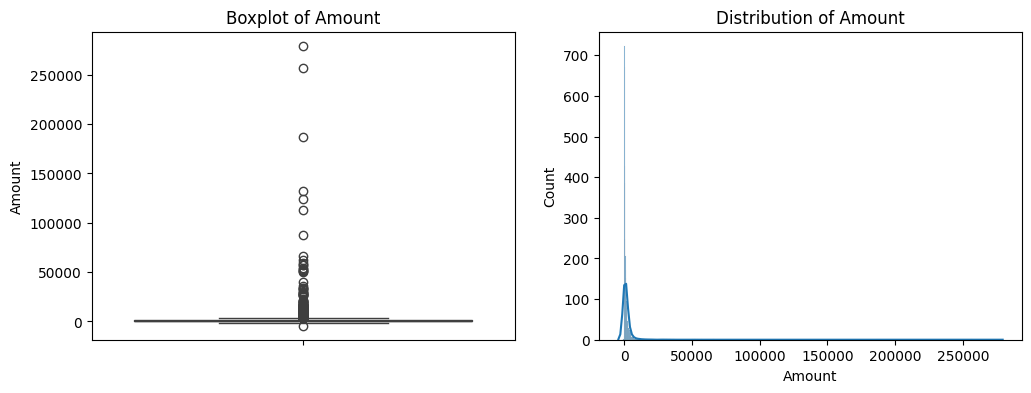

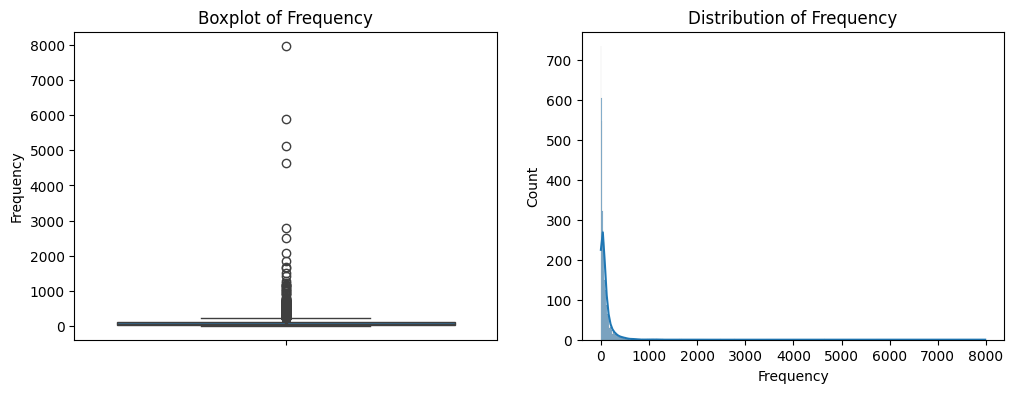

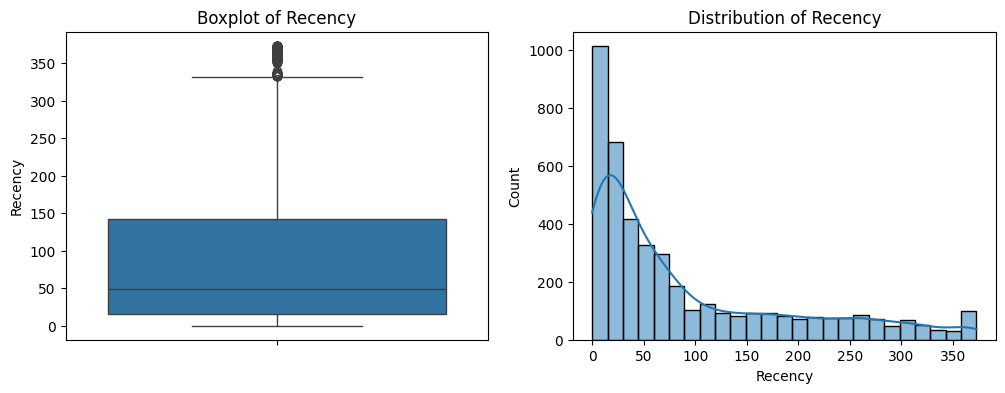

In [ ]:
# Univariate Analysis
for col in rfm.columns[1:]:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(rfm[col])
    plt.title(f'Boxplot of {col}')

    plt.subplot(1, 2, 2)
    sns.histplot(rfm[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

##**Bivariate Analysis**

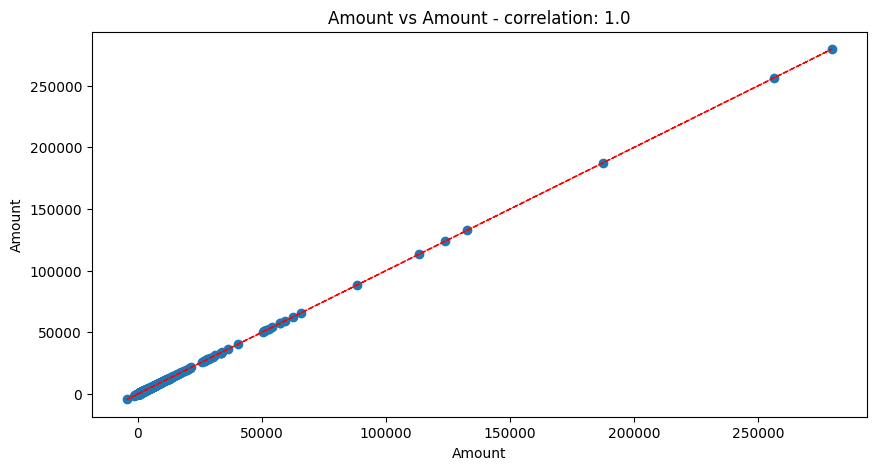

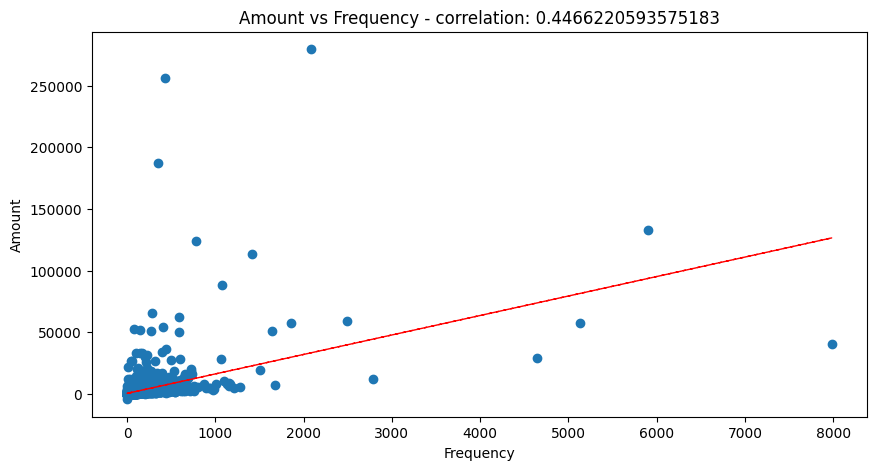

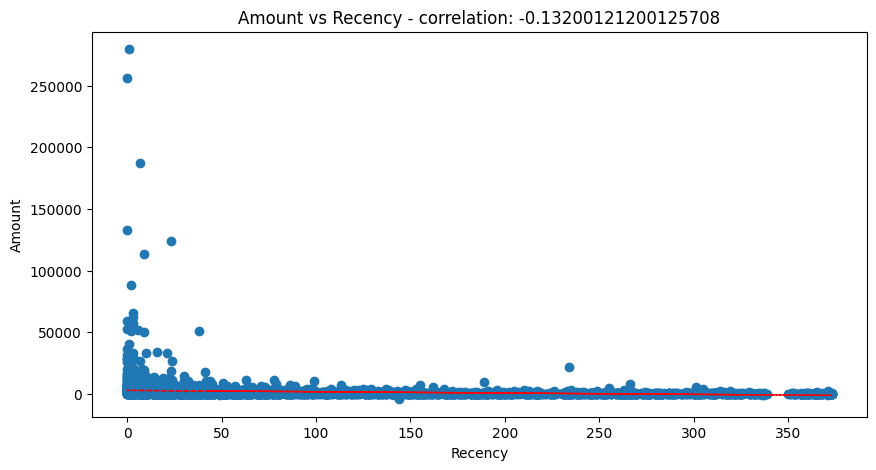

In [ ]:
# Bivariate Analysis
for col in rfm.columns[1:]:
    plt.figure(figsize=(10, 5))
    feature = rfm[col]
    label = rfm['Amount']  # Assuming 'Amount' is the dependent variable for illustration

    correlation = feature.corr(label)

    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Amount')
    plt.title(f'Amount vs {col} - correlation: {correlation}')

    z = np.polyfit(rfm[col], rfm['Amount'], 1)
    y_hat = np.poly1d(z)(rfm[col])
    plt.plot(rfm[col], y_hat, "r--", lw=1)

    plt.show()


##**Multivariate Analysis**

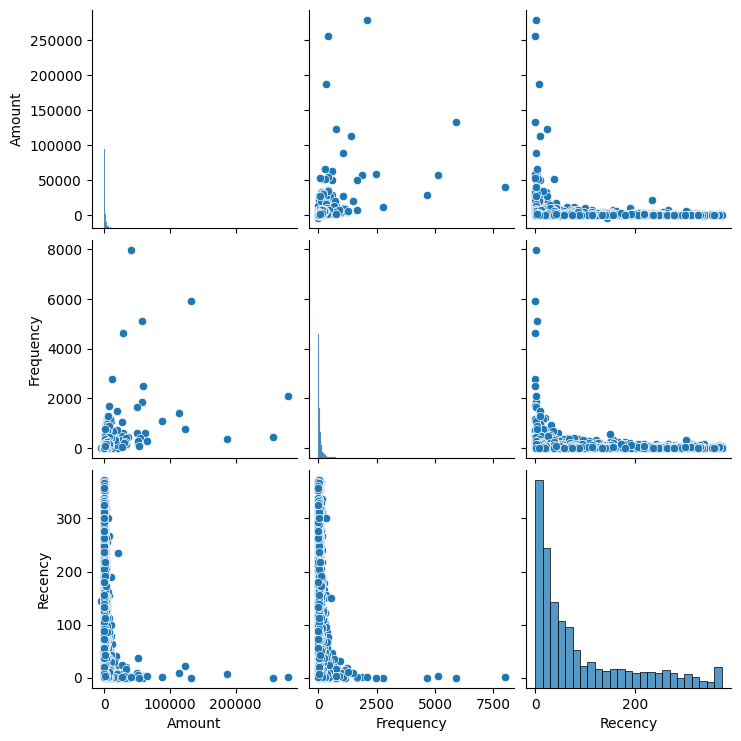

In [ ]:
# Multivariate Analysis
sns.pairplot(rfm[['Amount', 'Frequency', 'Recency']])
plt.show()


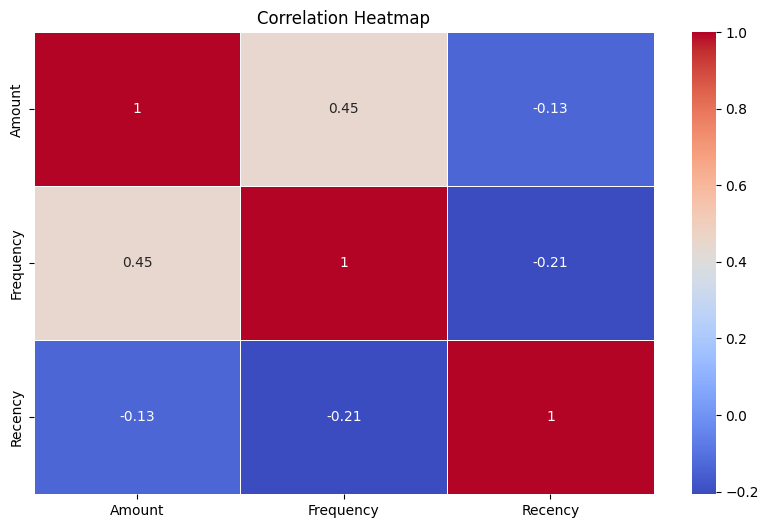

In [ ]:
# Heat Map
plt.figure(figsize=(10, 6))
corr_matrix = rfm[['Amount', 'Frequency', 'Recency']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

##**remove outliers**

In [ ]:
# Define a function to remove outliers using IQR method
def remove_outliers(rfm, columns):
    # Calculate the IQR for each column
    for col in columns:
        Q1 = rfm[col].quantile(0.05)
        Q3 = rfm[col].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        rfm = rfm[(rfm[col] >= lower_bound) & (rfm[col] <= upper_bound)]
    return rfm

# Remove outliers from 'Amount', 'Frequency', and 'Recency'
df_cleaned = remove_outliers(rfm, ['Amount', 'Frequency', 'Recency'])

In [ ]:
# Display the cleaned DataFrame
print("DataFrame after removing outliers:")
df_cleaned.head()

DataFrame after removing outliers:


,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


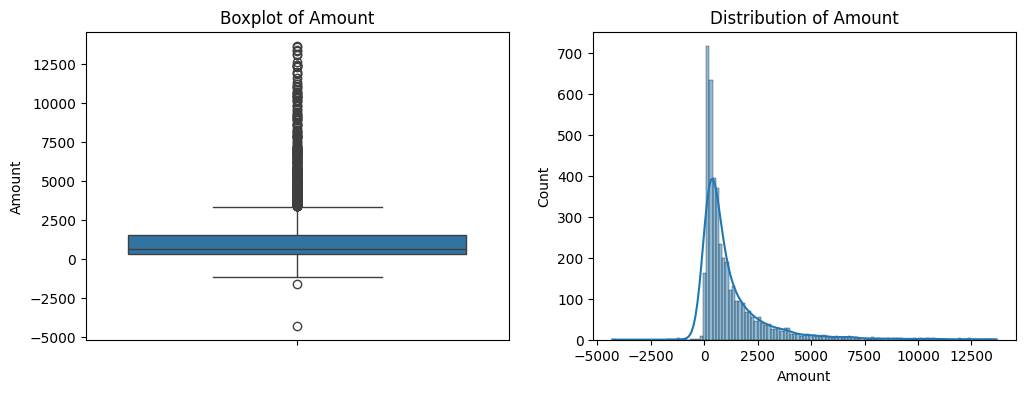

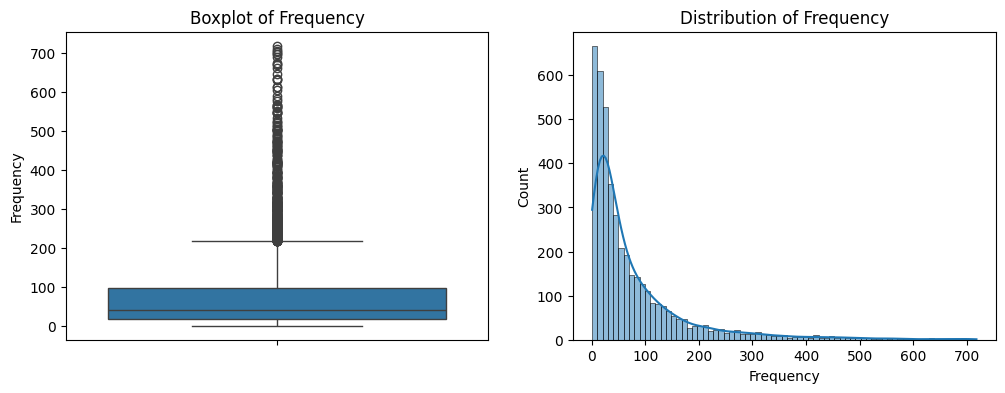

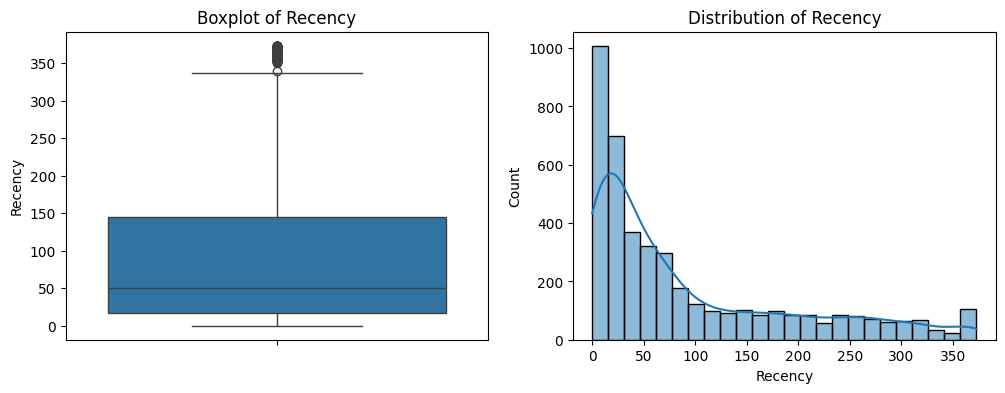

In [ ]:
# Visualize the cleaned data
# Univariate Analysis on cleaned data
for col in df_cleaned.columns[1:]:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(df_cleaned[col])
    plt.title(f'Boxplot of {col}')

    plt.subplot(1, 2, 2)
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

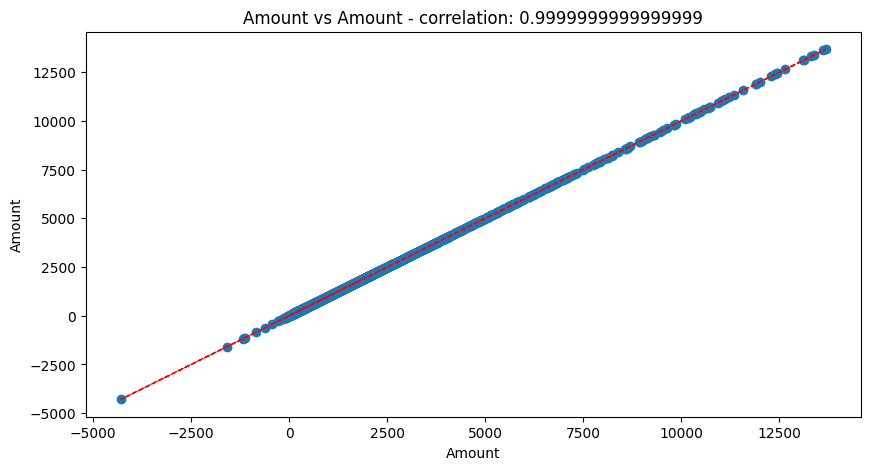

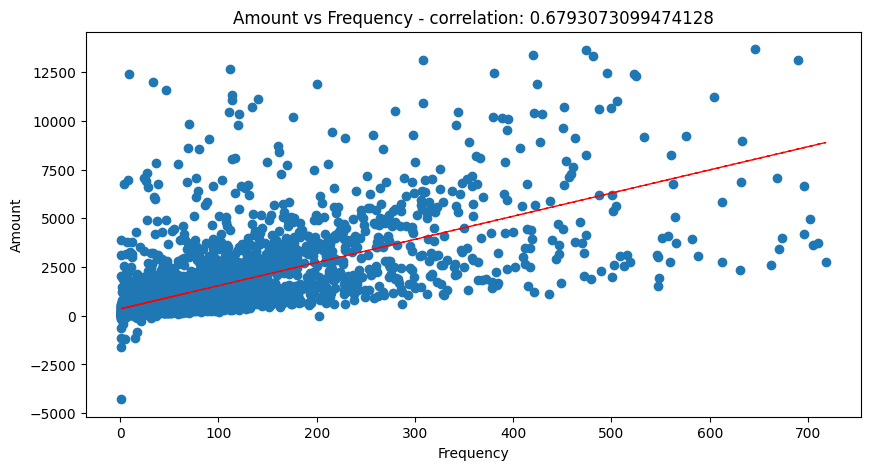

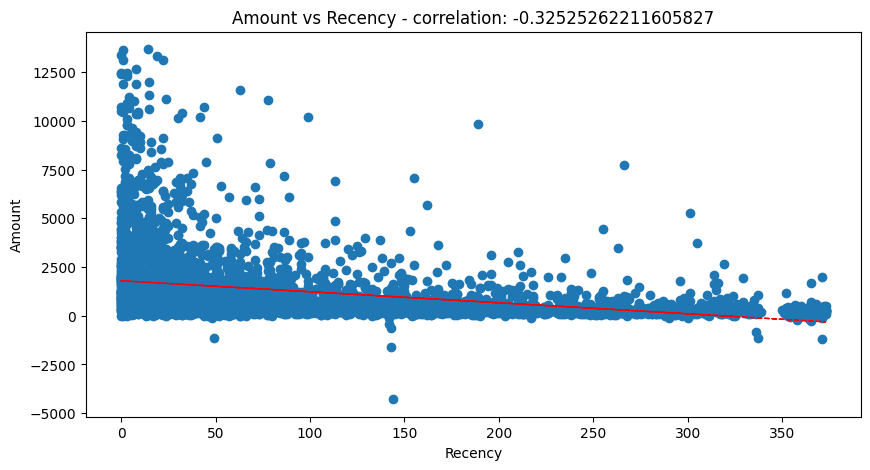

In [ ]:
# Bivariate Analysis on cleaned data
for col in df_cleaned.columns[1:]:
    plt.figure(figsize=(10, 5))
    feature = df_cleaned[col]
    label = df_cleaned['Amount']  # Assuming 'Amount' is the dependent variable for illustration

    correlation = feature.corr(label)

    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Amount')
    plt.title(f'Amount vs {col} - correlation: {correlation}')

    z = np.polyfit(df_cleaned[col], df_cleaned['Amount'], 1)
    y_hat = np.poly1d(z)(df_cleaned[col])
    plt.plot(df_cleaned[col], y_hat, "r--", lw=1)

    plt.show()


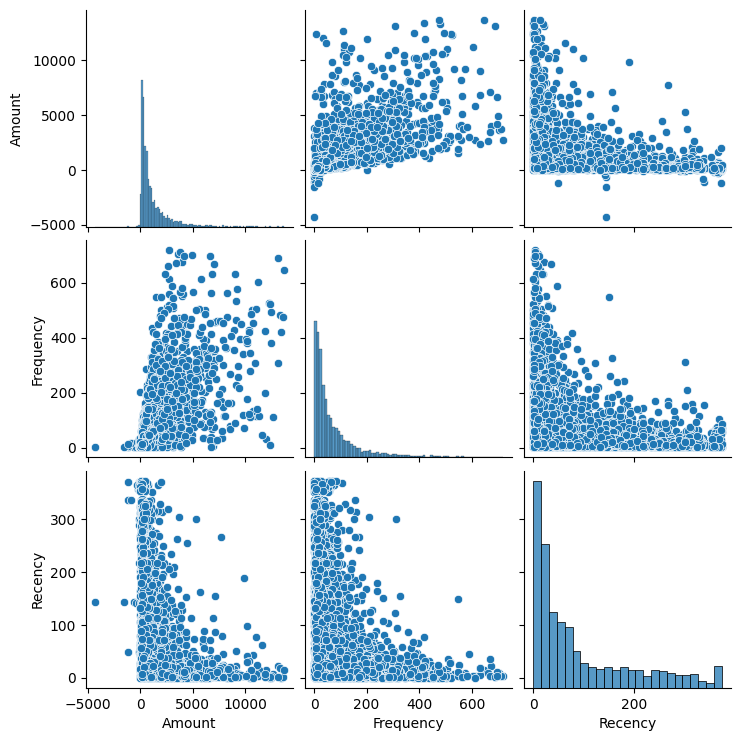

In [ ]:
# Multivariate Analysis on cleaned data
# Pairplot
sns.pairplot(df_cleaned[['Amount', 'Frequency', 'Recency']])
plt.show()

##Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
df_cleaned = df_cleaned[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(df_cleaned)
rfm_df_scaled.shape


(4293, 3)

In [ ]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


#**Model Building**

In [ ]:
X = rfm_df_scaled[['Amount', 'Frequency', 'Recency']].values

In [ ]:
X

array([[-0.72373821, -0.75288754,  2.30161144],
       [ 1.73161722,  1.04246665, -0.90646561],
       [ 0.30012791, -0.46363604, -0.18365813],
       ...,
       [-0.67769602, -0.70301659,  0.86589794],
       [-0.6231313 , -0.64317145, -0.84705678],
       [ 0.32293822, -0.07464263, -0.50050524]])

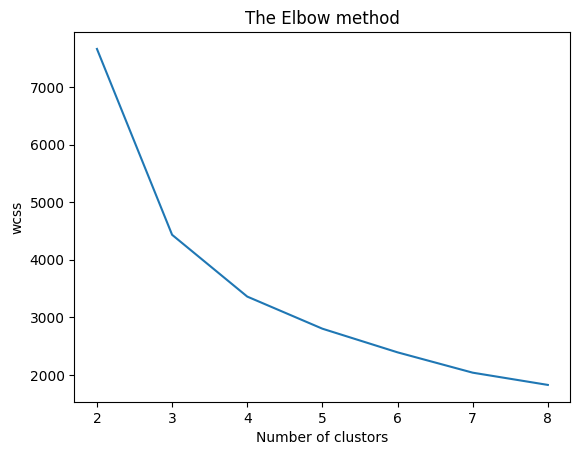

In [ ]:
#elbow method
#finding the optimal K value in a k-means clustering algorithm
from sklearn.cluster import KMeans
wcss = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]#taking range
for i in range_n_clusters:
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init = 10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range_n_clusters, wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clustors')
plt.ylabel('wcss')
plt.show()

In [ ]:
#fit the model
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
rfm_df_scaled['Cluster'] = kmeans.fit_predict(X)

In [ ]:
y_kmeans = rfm_df_scaled['Cluster']

In [ ]:
 kmeans.labels_

array([1, 0, 2, ..., 1, 2, 2], dtype=int32)

In [ ]:
# Display the cluster number to which each data point belongs
rfm_df_scaled[['Amount', 'Frequency', 'Recency', 'Cluster']].head()

,Amount,Frequency,Recency,Cluster
0,-0.723738,-0.752888,2.301611,1
1,1.731617,1.042467,-0.906466,0
2,0.300128,-0.463636,-0.183658,2
3,0.277517,-0.044720,-0.738141,2
4,-0.533235,-0.603275,2.143188,1


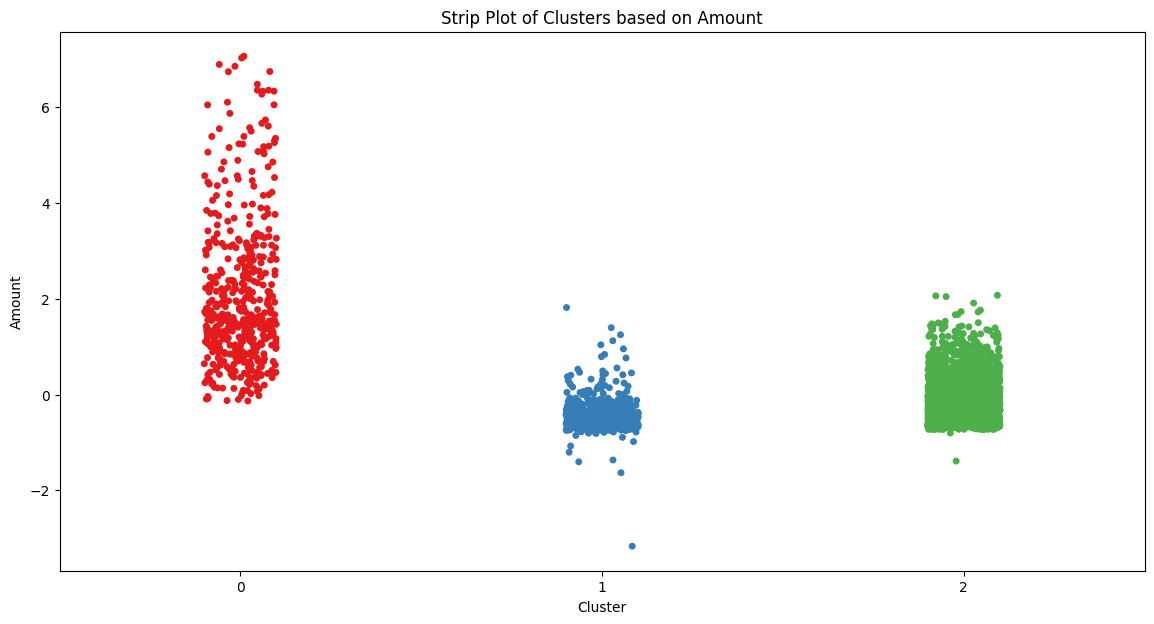

In [ ]:

# Strip plot for visualization
#Clusters Based on Amount
plt.figure(figsize=(14, 7))
sns.stripplot(x='Cluster', y='Amount', data=rfm_df_scaled, jitter=True, palette='Set1')
plt.title('Strip Plot of Clusters based on Amount')
plt.xlabel('Cluster')
plt.ylabel('Amount')
plt.show()

##**Conclusion:**

**1.Cluster 0:** This cluster shows a wide range of Amount values, with some
customers spending very high amounts. This cluster may represent high-value customers who tend to spend more.

**2.Cluster 1:** The Amount values for this cluster are mostly centered around a moderate range, indicating medium-value customers.

**3.Cluster 2:** Customers in this cluster generally have lower Amount values, suggesting they are low-value customers who spend less on average.

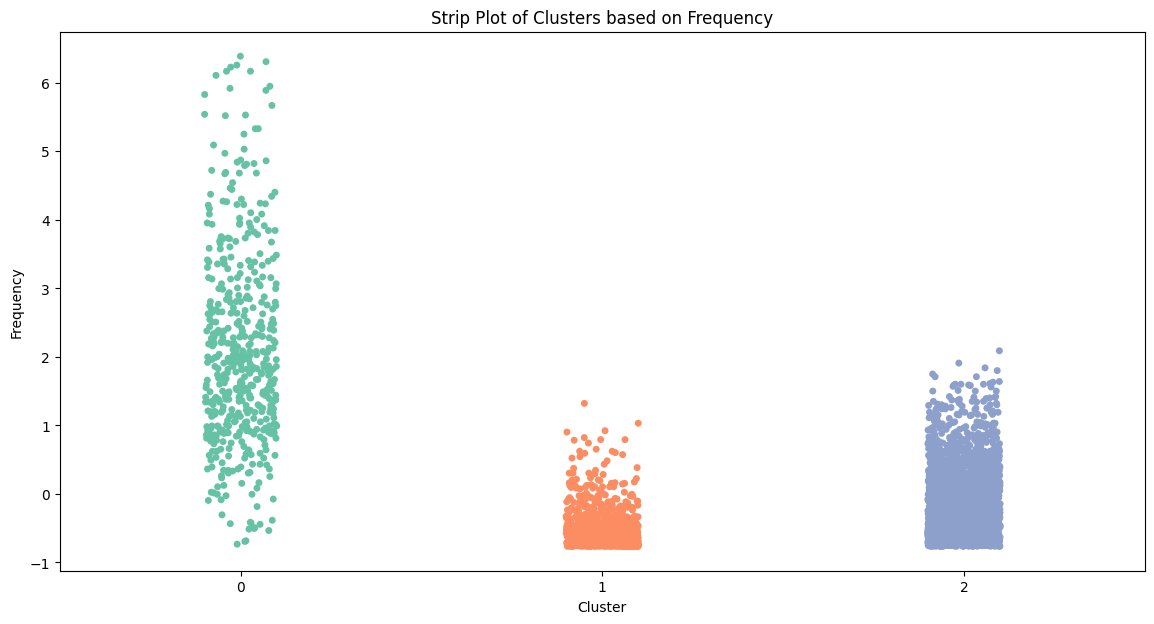

In [ ]:
# Strip Plot of Clusters Based on Frequency
plt.figure(figsize=(14, 7))
sns.stripplot(x='Cluster', y='Frequency', data=rfm_df_scaled, jitter=True, palette='Set2')
plt.title('Strip Plot of Clusters based on Frequency')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.show()

##**Conclusion:**

**1.Cluster 0:** This cluster contains customers with the highest Frequency values, meaning they make purchases most often. This cluster represents very frequent buyers.

**2.Cluster 1:** Customers in this cluster have a moderate Frequency, indicating they make purchases with average frequency.

**3.Cluster 2:** The Frequency values for this cluster are the lowest, suggesting these customers make purchases infrequently.

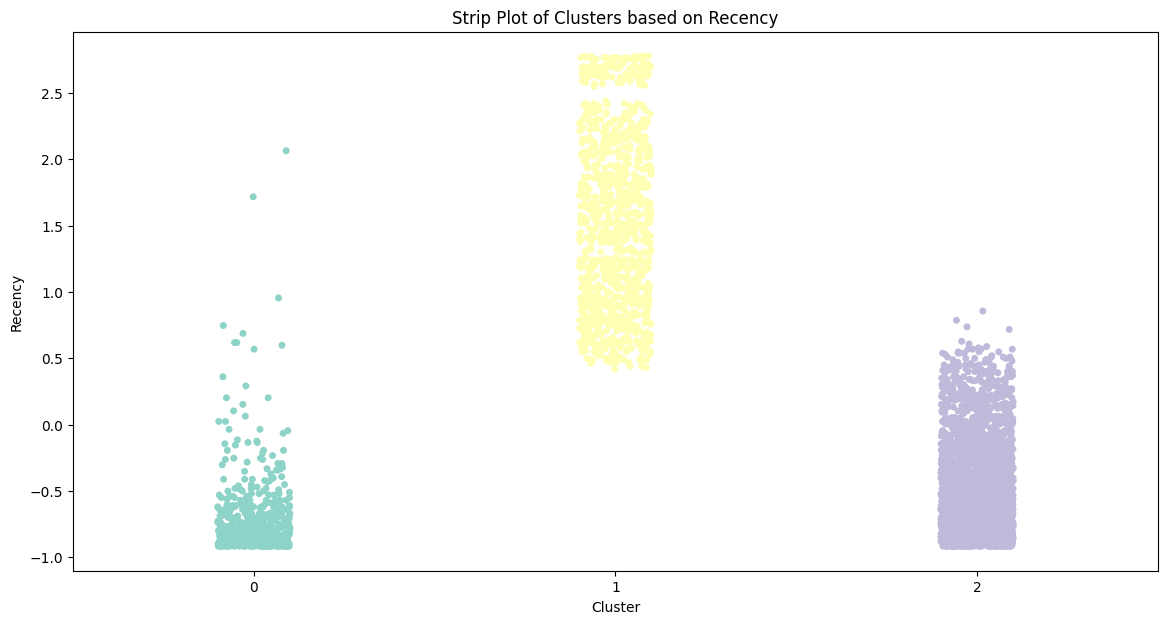

In [ ]:
#Strip Plot of Clusters Based on Recency
plt.figure(figsize=(14, 7))
sns.stripplot(x='Cluster', y='Recency', data=rfm_df_scaled, jitter=True, palette='Set3')
plt.title('Strip Plot of Clusters based on Recency')
plt.xlabel('Cluster')
plt.ylabel('Recency')
plt.show()

##**Conclusion:**

1.**Cluster 0:** Customers in this cluster have the lowest Recency values, meaning they made purchases very recently. This cluster includes the most recently active customers.

**2.Cluster 1:** This cluster shows higher Recency values, indicating that these customers have not made purchases for a longer time compared to the other clusters.

**3.Cluster 2:** Customers in this cluster have moderate Recency values, suggesting they made purchases relatively recently but not as recently as Cluster 0.

#**General Insights:**

##**High-Value Customers (Cluster 0):**

1.These customers spend the most (Amount), purchase most frequently (Frequency), and have made recent purchases (Recency).

2.They are ideal targets for loyalty programs and special offers to maintain their engagement and spending levels.

##**Medium-Value Customers (Cluster 1):**

1.These customers have moderate spending, frequency, and are the least recent in terms of purchases.

2.They might need re-engagement strategies to encourage them to purchase more frequently and spend more.

##**Low-Value Customers (Cluster 2):**

1.These customers spend the least, purchase infrequently, but have relatively recent purchases.

2.They could be potential growth opportunities with targeted marketing to increase their purchase frequency and amount.

#**Save Model**

In [ ]:
import pickle
#Define filename for pickle file

filename = 'kmeans_model.pkl'

#open file in write mode
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

#close the file

file.close()

pickle.dump(kmeans, open('kmeans_model.pkl', 'wb'))